In this project, we combined email datasets from two sources for phishing detection. The combined dataset (before cleaning) includes :

Enron (Benign):
~15,000 non-phishing emails extracted from the Enron email corpus — widely regarded as a reliable dataset for legitimate communications.

Kaggle Phishing Dataset:
~10,000 phishing emails collected from Kaggle's phishing email dataset, labeled as phishing (label = 1).


## 1.Preprocessing Steps

Standardized column names and encodings.

Added a label column:

1 for phishing

0 for benign (Enron)

Concatenated all datasets with a Source column.

Checked and removed duplicate emails (based on the Message field), even if they came from different sources.

Saved final result as combined_raw_dataset.csv.


In [47]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [48]:
!pip install seaborn


In [49]:
!pip install nltk

In [50]:
!pip install wordcloud

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk
import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/azaleadj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
import os


os.chdir("/Users/azaleadj/Desktop/Uvic/summer/592/project/Summer-2025-ECE-597-Group4/DataPreprocessing")


print("Current directory:", os.getcwd())


Current directory: /Users/azaleadj/Desktop/Uvic/summer/592/project/Summer-2025-ECE-597-Group4/DataPreprocessing


Preprocessing Steps
Standardized column names and encodings.

Added a label column:

1 for phishing

0 for benign (Enron)

Concatenated all datasets with a Source column.

Checked and removed duplicate emails (based on the Message field), even if they came from different sources.

Saved final result as combined_raw_dataset.csv.


In [53]:
# load Enron dataset
enron_df = pd.read_csv("enron_emails.csv")

enron_df.head()
enron_df.shape

enron_sampled = enron_df.sample(n=150000, random_state=42)  # extract 150000 data from enron

print("data devisions after sampled：", enron_sampled.shape)
print(enron_sampled.head())


data devisions after sampled： (150000, 2)
                                              file  \
427616                     shackleton-s/sent/1912.   
108773                    farmer-d/logistics/1066.   
355471                  parks-j/deleted_items/202.   
457837  stokley-c/chris_stokley/iso/client_rep/41.   
124910               germany-c/all_documents/1174.   

                                                  message  
427616  Message-ID: <21013688.1075844564560.JavaMail.e...  
108773  Message-ID: <22688499.1075854130303.JavaMail.e...  
355471  Message-ID: <27817771.1075841359502.JavaMail.e...  
457837  Message-ID: <10695160.1075858510449.JavaMail.e...  
124910  Message-ID: <27819143.1075853689038.JavaMail.e...  


In [54]:
def extract_body(raw_msg):
    try:
        return raw_msg.split('\n\n', 1)[1]
    except IndexError:
        return ""

enron_sampled['body'] = enron_sampled['message'].apply(extract_body)
enron_sampled['label'] = '0'
enron_sampled_clean = enron_sampled[['body', 'label']].rename(columns={'body': 'Message'})
enron_sampled_clean.head()


,Message,label
427616,Bill: Thanks for the info. I also spoke wit...,0
108773,"Aimee,\nPlease check meter #1591 Lamay gas lif...",0
355471,GCCA Crawfish and rip-off raffle & over-priced...,0
457837,"<<Keoni.zip>> Chris, per your request here ar...",0
124910,I'm trying to change the Receipt Meter on deal...,0


In [55]:
# find phishing email dataset from kaggle

kaggle_phishing_df = pd.read_csv("kaggle_phishing_email.csv")
kaggle_phishing_df.shape

kaggle_phishing_df['label'].value_counts()

# kaggle_phishing_df[kaggle_phishing_df['label'] == 1].head(10)


kaggle_phishing_samples = kaggle_phishing_df[kaggle_phishing_df['label'] == 1].sample(n=10000, random_state=42)


kaggle_phishing_samples = kaggle_phishing_samples.rename(columns={"text_combined": "Message"})
kaggle_phishing_samples.head



<bound method NDFrame.head of                                                  Message  label
36711  angel guerra dwtheballoonroommtheballoonroomne...      1
79819  mrs aisha mohammed aishamohmshecom frommrs moh...      1
67836  cnn alerts afurak1977renimusiccom cnn alerts c...      1
82049  monkeyorg vicinfinitextilcom  10 dec 2019 0843...      1
40258  hallee know smurfette wished guy bigger mushro...      1
...                                                  ...    ...
20700  usb 2 0 3 5 external hard drives usb 40 gb 69 ...      1
9220   graphics software available cheap oem versions...      1
44048  gris lorraine loveddmindwaveresearchcom dear c...      1
57691  phyllis goddard linbirichtermetbirichterde dif...      1
33748  dick dudley winfredmacedoniakocheuropeaninstit...      1

[10000 rows x 2 columns]>

In [56]:
# combine two datasets
all_emails_df = pd.concat([
    kaggle_phishing_samples[['Message', 'label']],
    enron_sampled_clean[['Message', 'label']]
], ignore_index=True)


print(all_emails_df.shape)
print(all_emails_df['label'].value_counts())


(160000, 2)
label
0    150000
1     10000
Name: count, dtype: int64


In [57]:
before = all_emails_df.shape[0]
all_emails_df.drop_duplicates(subset='Message', inplace=True)
after = all_emails_df.shape[0]
print(f"deleted duplicated emails: {before - after} ")

deleted duplicated emails: 35870 


In [58]:
print(all_emails_df.shape)
print(all_emails_df['label'].value_counts())

(124130, 2)
label
0    114134
1      9996
Name: count, dtype: int64


In [59]:
import re
def clean_text(text):
    text = text.lower()
    # keep URL、email、HTML,number,$,@,:/
    
    text = re.sub(r'[^\x00-\x7f]', ' ', text)              # delete non ASCII
    text = re.sub(r'\b[a-z]{1,2}\b', '', text)             # delet short word
    text = re.sub(r'[^a-z0-9\s@$:/]', '', text)               
    text = re.sub(r'\s+', ' ', text).strip()
    return text



   


In [60]:
all_emails_df['Clean_Message'] = all_emails_df['Message'].apply(clean_text)



In [61]:
all_emails_df[['Message', 'Clean_Message', 'label']].head()


,Message,Clean_Message,label
0,angel guerra dwtheballoonroommtheballoonroomne...,angel guerra dwtheballoonroommtheballoonroomne...,1
1,mrs aisha mohammed aishamohmshecom frommrs moh...,mrs aisha mohammed aishamohmshecom frommrs moh...,1
2,cnn alerts afurak1977renimusiccom cnn alerts c...,cnn alerts afurak1977renimusiccom cnn alerts c...,1
3,monkeyorg vicinfinitextilcom 10 dec 2019 0843...,monkeyorg vicinfinitextilcom 10 dec 2019 08430...,1
4,hallee know smurfette wished guy bigger mushro...,hallee know smurfette wished guy bigger mushro...,1


In [62]:

from sklearn.utils import shuffle

# shuffle
all_emails_df = shuffle(all_emails_df, random_state=42).reset_index(drop=True)

In [63]:
all_emails_df.head()

,Message,label,Clean_Message
0,\n\nStart Date: 10/13/01; HourAhead hour: 22; ...,0,start date: 10/13/01 hourahead hour: 22 ancill...
1,---------------------- Forwarded by Vince J Ka...,0,forwarded vince kaminski/hou/ect 03/27/2000 20...
2,\n [IMAGE] Webcast June 14th @ 2:00...,0,image webcast june 14th @ 2:00pm edt click reg...
3,\n\n -----Original Message-----\nFrom: =09Dupo...,0,original message from: 09dupont anita 20 sent:...
4,"Jeff--please change my name to ""mike d. smith""...",0,jeffplease change name mike smith thanks forwa...


In [64]:
all_emails_df.to_csv("combined_raw_dataset.csv", index=False)


In [65]:
# View label distribution (counts and proportions)
label_counts = all_emails_df['label'].value_counts()
label_ratio = all_emails_df['label'].value_counts(normalize=True)

print("Label count distribution:\n", label_counts)
print("\nLabel proportion distribution:\n", label_ratio)


Label count distribution:
 label
0    114134
1      9996
Name: count, dtype: int64

Label proportion distribution:
 label
0    0.919472
1    0.080528
Name: proportion, dtype: float64


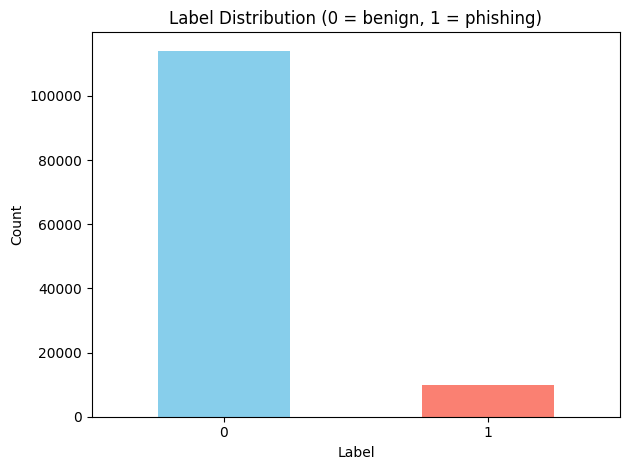

In [66]:


label_counts = all_emails_df['label'].value_counts()
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution (0 = benign, 1 = phishing)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
